# Data Anlyst and Intergrator Assessment

### Setting up enviroment

In [33]:
# Add Matplotlib inline 
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.graph_objects as go
import glob
import googlemaps

#Add gmaps
import requests
import gmaps
import urllib

In [4]:
#load Parking tags files from 2019 and 2020
#the following can be later turned into a function for reuse with parking tags for different years.

path = green_p_parking = "Data_files/parking-tickets-2020"
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [5]:
parking_tags_2020 = frame        
#Validate number of rows for 2020
parking_tags_2020.head()
len(parking_tags_2020)

1403663

In [6]:
#Repeat the process for 2019 parking tags data
path = green_p_parking = "Data_files/parking-tickets-2019"

all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
parking_tags_2019 = frame

#Validating head and row count
parking_tags_2019.head()
len(parking_tags_2019)

2213939

In [7]:
#Merging 2019 and 2020 Data frames

frames = [parking_tags_2019, parking_tags_2020]

parking_tags_2019_2020 = pd.concat(frames)

#Validating head and row count
parking_tags_2019_2020.head()
len(parking_tags_2019_2020)

3617602

In [8]:
# Read the City Ward, demographics and TTC Stops dataset

city_wards = "Data_files/City Wards Data - 4326/City Wards Data - 4326.csv"
city_wards_df = pd.read_csv(city_wards)


demographics_df = pd.read_excel("Data_files/demographics-nhs-indicators-2011.xlsx")
education_df = pd.read_excel("Data_files/education-nhs-indicators-2011.xlsx")
ttc_stops = pd.read_csv("Data_files/TTC Routes and Schedules Data/stops.txt")

#Setting chained assignment options
pd.options.mode.chained_assignment 

'warn'

In [9]:
#Flatten greepn p parking dataset

green_p_parking = "Data_files/green-p-parking-2019.json"
import json

with open(green_p_parking, 'r') as f:
    data = json.load(f)

# Output: {'name': 'Bob', 'languages': ['English', 'French']}
# print(data)

# df = pd.read_json(green_p_parking)
green_p_parking_df = pd.json_normalize(data,record_path=['carparks'])
green_p_parking_df.head()

,id,slug,address,lat,lng,rate,carpark_type,carpark_type_str,is_ttc,is_under_construction,...,map_marker_logo,alert_box,enable_streetview,streetview_lat,streetview_long,streetview_yaw,streetview_pitch,streetview_zoom,rate_details.periods,rate_details.addenda
0,1,https://parking.greenp.com/carpark/1_20-charle...,20 Charles Street East,43.669282202140174,-79.3852894625656,$2.50 / Half Hour,garage,Garage,False,False,...,greenp_only,Monthly Permits are no longer available at thi...,yes,43.669282202140174,-79.3852894625656,321.21,-12.45,0,"[{'title': 'Monday - Sunday & Holidays', 'rate...",[]
1,3,https://parking.greenp.com/carpark/3_13-isabel...,13 Isabella Street,43.667577,-79.384707,$3.00 / Half Hour,surface,Surface,False,False,...,greenp_only,,yes,43.667735,-79.384966,115.84,7.51,0,"[{'title': 'Monday - Sunday & Holidays', 'rate...",[]
2,5,https://parking.greenp.com/carpark/5_15-welles...,15 Wellesley Street East,43.664837,-79.383591,$3.00 / Half Hour,surface,Surface,False,False,...,greenp_bikeshare,,yes,43.665083,-79.383807,138.09,-4.68,0,"[{'title': 'Monday - Sunday & Holidays', 'rate...",[]
3,11,https://parking.greenp.com/carpark/11_21-pleas...,21 Pleasant Blvd.,43.687092,-79.392850,$3.00 / Half Hour,garage,Garage,False,False,...,greenp_only,,yes,43.686491,-79.392056,280.08,-13.18,0,"[{'title': 'Monday - Sunday & Holidays', 'rate...",[]
4,12,https://parking.greenp.com/carpark/12_30-alvin...,30 Alvin Avenue,43.68919056469554,-79.39269983525526,$3.50 / Half Hour,surface,Surface,False,False,...,greenp_only,,yes,43.68919056469554,-79.39269983525526,330.84,1.32,0,[{'title': 'Day Maximum until 6 PM - $25.00 (E...,[]


In [10]:
#Validating data 

green_p_parking_df.dtypes
# green_p_parking_df['Coordinates'].value_counts()
green_p_parking_df['lat'] = green_p_parking_df.lat.astype(float)
green_p_parking_df['lng'] = green_p_parking_df.lng.astype(float)
green_p_parking_df.dtypes

id                          object
slug                        object
address                     object
lat                        float64
lng                        float64
rate                        object
carpark_type                object
carpark_type_str            object
is_ttc                        bool
is_under_construction         bool
changing_rates                bool
rate_half_hour              object
capacity                    object
max_height                  object
bike_racks                  object
payment_methods             object
payment_options             object
monthly_permit_status       object
monthly_permit_quantity     object
monthly_permit_price        object
map_marker_logo             object
alert_box                   object
enable_streetview           object
streetview_lat              object
streetview_long             object
streetview_yaw              object
streetview_pitch            object
streetview_zoom             object
rate_details.periods

In [11]:
# Check data types for ttc stops data

# ttc_stops.head()
# len(ttc_stops.index)
ttc_stops.dtypes

stop_id                  int64
stop_code                int64
stop_name               object
stop_desc              float64
stop_lat               float64
stop_lon               float64
zone_id                float64
stop_url               float64
location_type          float64
parent_station         float64
stop_timezone          float64
wheelchair_boarding      int64
dtype: object

In [12]:
#Check Geometry Data for City Wards dataset

pd.set_option('display.max_columns', None)
# city_wards_df.head(5)
city_wards_df['geometry']

0     {'type': 'Polygon', 'coordinates': (((-79.4910...
1     {'type': 'Polygon', 'coordinates': (((-79.4404...
2     {'type': 'Polygon', 'coordinates': (((-79.3944...
3     {'type': 'Polygon', 'coordinates': (((-79.3900...
4     {'type': 'Polygon', 'coordinates': (((-79.2986...
5     {'type': 'Polygon', 'coordinates': (((-79.2790...
6     {'type': 'Polygon', 'coordinates': (((-79.1647...
7     {'type': 'Polygon', 'coordinates': (((-79.2259...
8     {'type': 'Polygon', 'coordinates': (((-79.1819...
9     {'type': 'Polygon', 'coordinates': (((-79.2502...
10    {'type': 'Polygon', 'coordinates': (((-79.3164...
11    {'type': 'Polygon', 'coordinates': (((-79.3523...
12    {'type': 'Polygon', 'coordinates': (((-79.3887...
13    {'type': 'Polygon', 'coordinates': (((-79.4693...
14    {'type': 'Polygon', 'coordinates': (((-79.5793...
15    {'type': 'Polygon', 'coordinates': (((-79.4977...
16    {'type': 'Polygon', 'coordinates': (((-79.5276...
17    {'type': 'Polygon', 'coordinates': (((-79.

In [13]:
#Display all columns of City Wards to view full data

pd.set_option('display.max_columns', None)
demographics_df.head()

,Hood#,Total Population,Child0-14,Youth15-24,Seniors65,Total visible minority population,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,"Visible minority, n.i.e.",Multiple visible minorities,Not a visible minority,Total - Mobility status 5 years ago,Non-movers,Movers,Total recent immigrant population in private households by selected places of birth,Middle East/Western Asia,Eastern,South East,Southern,Other places of birth in Asia,Americas w/o USA,Europe,Africa,Total population aged 15 years and over by labour force status,In the labour force,Unemployed,Not in the labour force,"No certificate, diploma or degree","College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,Total number of private households by tenure,Owner,Renter,% of owner households spending 30% or more of household total income on shelter costs,Major repairs needed,Average monthly shelter costs for rented dwellings ($),Average after-tax family income $ (Family income in 2010 of economic families),Household income in 2010 of private households,Median household total income $,Median after-tax household income $
0,ID,popt01,popt201,popt202,popt204,vismin01,vismin04,vismin05,vismin03,vismin09,vismin11,vismin15,vismin08,vismin16,vismin06,vismin07,vismin14,vismin13,vismin17,res5_1,res1_2,res1_3,recbirth1,recbirth68,recbirth69,recbirth73,recbirth76,NaN,recbirth51,recbirth52,recbirth61,plf15_1,plf15_2,plf15_4,plf15_5,higheda02,higheda03,higheda09,occprdw20,occprdw05,occprdw06,shelter30,occprdw11,occprdw21,infamtx12,incprhh01,incprhh14,incprhh58
1,1,34100,5970,5405,4305,26475,13080,695,6385,1470,1220,235,820,220,100,55,1615,580,6855,31460,20635,10820,2750,0,65,250,1495,40.0,530,40,260,27365,17610,1750,9755,6170,4375,1445,10130,7075,3050,27.9,415,945,72820,10130,66241,59703
2,2,32790,7665,5020,2945,28175,12720,200,8285,680,870,1605,560,1160,85,0,1565,435,4525,30105,16210,13895,5850,1380,0,120,2625,30.0,710,75,830,24980,14655,2175,10320,6855,3325,1090,9610,4540,5070,33.3,1100,921,57411,9610,49934,46986
3,3,10140,1825,1350,1745,6285,2285,105,1530,485,670,210,200,285,0,10,225,275,3705,9380,6290,3085,1070,195,0,80,400,0.0,190,15,130,8135,4825,530,3315,1970,1180,650,3225,2080,1145,25.1,170,887,70838,3225,62042,57522
4,4,10485,1585,1315,1915,4425,1435,200,1025,245,650,55,85,40,90,50,385,175,5735,9705,6890,2815,800,0,35,20,405,0.0,255,50,0,8600,5270,590,3330,2095,1450,350,3945,2010,1935,19.7,340,857,69367,3945,56545,51194


In [14]:
#View eductaion demographics data

education_df.head(5)

,Geography,"Total population aged 15 years and over by highest certificate, diploma or degree","No certificate, diploma or degree",High school diploma or equivalent,"Postsecondary certificate, diploma or degree",Apprenticeship or trades certificate or diploma,"College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,"University certificate, diploma or degree at bachelor level or above",Bachelor's degree,"University certificate, diploma or degree above bachelor level",Unnamed: 11,Unnamed: 12
0,TOR - HOOD - Agincourt North (129) ( 23.7%),25765,5965,7480,12320,1015,3465,1805,6030,4350,1680,NaN,HIERARCHY
1,TOR - HOOD - Agincourt South-Malvern West (128...,18595,4065,4840,9695,900,2730,1150,4920,3230,1690,NaN,Total population aged 15 years and over by hig...
2,TOR - HOOD - Alderwood (20) ( 25.4%),10210,2290,2560,5360,800,2090,455,2015,1390,625,NaN,"No certificate, diploma or degree"
3,TOR - HOOD - Annex (95) ( 27.9%),25185,1685,4275,19225,665,2580,1125,14855,7655,7195,NaN,High school diploma or equivalent
4,TOR - HOOD - Banbury-Don Mills (42) ( 23.6%),22855,2300,4715,15840,1170,3385,1400,9885,5665,4220,NaN,"Postsecondary certificate, diploma or degree"


In [15]:
#View data types, unique infractions for parking_tags_2019_2020, only the last line of code will display.
#first four lines can be run in seperate cells, this view is to save viewing area space.

parking_tags_2019_2020.count()
parking_tags_2019_2020.head()
parking_tags_2019_2020.dtypes
parking_tags_2019_2020['date_of_infraction'].value_counts()

parking_tags_2019_2020['date_of_infraction'].nunique()

731

In [16]:
#Formatting date column to analyse day, month and year data.

parking_tags_2019_2020['date_of_infraction'] = pd.to_datetime(parking_tags_2019_2020['date_of_infraction'], format='%Y%m%d')

In [17]:
#Checking for null values in location columns, as hat will be later used to 
#fetch latitudes and longitutes from google maps

parking_tags_2019_2020.isnull().sum()


tag_number_masked               0
date_of_infraction              0
infraction_code                 0
infraction_description          0
set_fine_amount                 0
time_of_infraction           3236
location1                  409062
location2                     293
location3                 3358713
location4                 3357918
province                        1
dtype: int64

In [18]:
#Dropping columns that will not be necessary for analysis.

parking_tags_2019_2020 = parking_tags_2019_2020.drop(['tag_number_masked','location1', 'location3', 'location4','province'], axis=1)

# Answering assessment analysis questions

In [19]:
#  3.1.1 Top 20 ticket infractions (frequency)

# only the last line of code will display.
# other lines can be run in seperate cells, this view is to save viewing area space.

total_infraction_count = parking_tags_2019_2020.groupby(["infraction_description","infraction_code"]).size()
top_20_infraction_count = total_infraction_count.nlargest(20)
top_20_infraction_count_df = pd.DataFrame(top_20_infraction_count).reset_index()

top_20_infraction_count_df.columns = ['infraction_description', 'infraction_code','Total']

top_20_infraction_count_df

,infraction_description,infraction_code,Total
0,PARK ON PRIVATE PROPERTY,3,794555
1,PARK-SIGNED HWY-PROHIBIT DY/TM,5,539221
2,PARK MACHINE-REQD FEE NOT PAID,207,501614
3,PARK PROHIBITED TIME NO PERMIT,29,442344
4,PARK - LONGER THAN 3 HOURS,2,211768
5,STOP-SIGNED HWY-PROHIBIT TM/DY,9,175074
6,PARK-VEH. W/O VALID ONT PLATE,406,131243
7,STAND VEH.-PROHIBIT TIME/DAY,8,112156
8,PARK-SIGNED HWY-EXC PERMT TIME,6,100684
9,STOP-SIGNED HIGHWAY-RUSH HOUR,403,87313


In [20]:
# 3.1.2 Top 20 ticket infractions (revenue)

total_infraction_revenue = parking_tags_2019_2020.groupby(["infraction_description"]).sum()["set_fine_amount"]
top_20_revenue = total_infraction_revenue.nlargest(20)
top_20_revenue_df = pd.DataFrame(top_20_revenue).reset_index()
top_20_revenue_df = top_20_revenue_df.rename(columns={'infraction_description':'infraction_description','set_fine_amount': "total revenue"})
top_20_revenue_df

,infraction_description,total revenue
0,PARK-SIGNED HWY-PROHIBIT DY/TM,26961200
1,PARK ON PRIVATE PROPERTY,23836650
2,PARK MACHINE-REQD FEE NOT PAID,15048420
3,STOP-SIGNED HWY-PROHIBIT TM/DY,14729260
4,PARK PROHIBITED TIME NO PERMIT,13270320
5,STOP-SIGNED HIGHWAY-RUSH HOUR,13096950
6,STAND VEH.-PROHIBIT TIME/DAY,9374160
7,PARK IN A FIRE ROUTE,6040250
8,PARK-VEH. W/O VALID ONT PLATE,5249720
9,STND ONSTRT ACCESSIBLE NO PRMT,4951800


In [21]:
# 3.1.3 Total revenue for all tickets

total_revenue_all = parking_tags_2019_2020['set_fine_amount'].sum()
total_revenue_all

178979520

In [22]:
# 3.1.4a Distance to closest parking lots for top 20 infractions

#Getting the top 20 rows of parking tags data 2019, 2020
top_20_rows_parking_tags = parking_tags_2019_2020[:20]
# top_20_rows_parking_tags

In [23]:
# Setting gmaps to fetch latitides and longitutes values for addresses of the parking infractions

# Import API key
import sys, os.path
sys.path.append(os.path.abspath('./'))
from config import g_maps_key

# Configure gmaps API key
gmaps.configure(api_key=g_maps_key)


In [25]:
pd.options.mode.chained_assignment 
top_20_rows_parking_tags["lat"] = ""
top_20_rows_parking_tags["lng"] = ""

# Adding lat and lng columns
top_20_rows_parking_tags

<ipython-input-25-17276d3990a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_rows_parking_tags["lat"] = ""
<ipython-input-25-17276d3990a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_rows_parking_tags["lng"] = ""


,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location2,lat,lng
0,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2011.0,548 DANFORTH AVE,,
1,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2011.0,510 COLLEGE ST,,
2,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2011.0,541 MOUNT PLEASANT RD,,
3,2019-11-24,29,PARK PROHIBITED TIME NO PERMIT,30,2012.0,PRINCESS ST,,
4,2019-11-24,2,PARK - LONGER THAN 3 HOURS,30,2012.0,32 FIELDWOOD DR,,
5,2019-11-24,355,PARK IN ACCESSIBLE NO PERMIT,450,2013.0,555 REXDALE BLVD,,
6,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2013.0,57 PROVOST DR,,
7,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2014.0,598 DANFORTH AVE,,
8,2019-11-24,29,PARK PROHIBITED TIME NO PERMIT,30,2014.0,PRINCESS ST,,
9,2019-11-24,48,FAIL TO PARK/STOP PARALL. CURB,30,2014.0,67 FIELDWOOD DR,,


In [32]:
#fetching lat lngs from  google maps api as that information in not present in the dataset.
#populating values for lat and lng in the top20 parking df


base_url= "https://maps.googleapis.com/maps/api/geocode/json?"
parameters = {
             "key": g_maps_key
}
    
for index, row in top_20_rows_parking_tags.iterrows():
    
    location = row['location2']
    if 'ST' in location:
          location = location.replace('ST', 'STREET')
            
    parameters['address'] = location
    
    locations = requests.get(f"{base_url}{urllib.parse.urlencode(parameters)}").json()
    
    try:
        top_20_rows_parking_tags.loc[index, "lat"] = locations["results"][0]["geometry"]["location"]["lat"]
        top_20_rows_parking_tags.loc[index, "lng"] = locations["results"][0]["geometry"]["location"]["lng"]
    except IndexError:
        print("Address not found")
        continue



Address not found
Address not found


In [ ]:
# 2 out of 20 addresses were not found by gmaps API

In [35]:
# gmaps = googlemaps.Client(key=g_maps_key)
# Creating a new columns for distance to Green P Parking
top_20_rows_parking_tags["Distance to Green P"] = ""

<ipython-input-35-45af377a283e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_rows_parking_tags["Distance to Green P"] = ""


In [37]:
# Replicating Haversine Distance fromula in Python to calculate distance:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km


In [39]:
#Creating function to calculate distance bewteen coordinates:

def find_nearest_parking(lat, lng):
    distances = green_p_parking_df.apply(lambda row: haversine(lat, lng, row['lat'], row['lng']), axis=1)
    closest_parking = distances.min()
    return closest_parking 

for index, row in top_20_rows_parking_tags.iterrows():
    lat = row['lat'] 
    lng = row ['lng']
    try:
        result = find_nearest_parking(lat,lng)
        top_20_rows_parking_tags.loc[index, "Distance to Green P"] = result
       
    except TypeError:
        print("Distance not found")
        continue


Distance not found
Distance not found


In [41]:
# 3.1.4a Distance to closest parking lots for top 20 infractions answer. 
# 2 out of 20 distances were not found as lats and lngs were not availalbe in the gmaps api call

top_20_rows_parking_tags


,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location2,lat,lng,Distance to Green P
0,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2011.0,548 DANFORTH AVE,43.6785,-79.3477,0.0743053
1,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2011.0,510 COLLEGE ST,,,
2,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2011.0,541 MOUNT PLEASANT RD,43.7028,-79.3877,0.145076
3,2019-11-24,29,PARK PROHIBITED TIME NO PERMIT,30,2012.0,PRINCESS ST,55.9517,-3.19797,8482.21
4,2019-11-24,2,PARK - LONGER THAN 3 HOURS,30,2012.0,32 FIELDWOOD DR,41.9962,-70.926,924.571
5,2019-11-24,355,PARK IN ACCESSIBLE NO PERMIT,450,2013.0,555 REXDALE BLVD,43.7151,-79.6037,4.30236
6,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2013.0,57 PROVOST DR,,,
7,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2014.0,598 DANFORTH AVE,43.6788,-79.3464,0.0223274
8,2019-11-24,29,PARK PROHIBITED TIME NO PERMIT,30,2014.0,PRINCESS ST,55.9517,-3.19797,8482.21
9,2019-11-24,48,FAIL TO PARK/STOP PARALL. CURB,30,2014.0,67 FIELDWOOD DR,41.9961,-70.9263,924.545


In [43]:
#3.1.4b Distance to closest TTC stop for top 20 infractions

top_20_rows_parking_tags["Distance to ttc"] = ""

<ipython-input-43-e5cd396683e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_rows_parking_tags["Distance to ttc"] = ""


In [44]:
def find_nearest_ttc(lat, lng):
    distances = ttc_stops.apply(lambda row: haversine(lat, lng, row['stop_lat'], row['stop_lon']), axis=1)
    closest_ttc = distances.min()
    return closest_ttc

for index, row in top_20_rows_parking_tags.iterrows():
    lat = row['lat'] 
    lng = row ['lng']
    try:
        result = find_nearest_ttc(lat,lng)
        top_20_rows_parking_tags.loc[index, "Distance to ttc"] = result
       
    except TypeError:
        print("Distance not found")
        continue

/Users/divitanarang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Distance not found
Distance not found


In [45]:
# 2 out of 20 distances were not found as lats and lngs were not availalbe in the gmaps api call
top_20_rows_parking_tags

,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location2,lat,lng,Distance to Green P,Distance to ttc
0,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2011.0,548 DANFORTH AVE,43.6785,-79.3477,0.0743053,0.0297698
1,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2011.0,510 COLLEGE ST,,,,
2,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2011.0,541 MOUNT PLEASANT RD,43.7028,-79.3877,0.145076,0.0116717
3,2019-11-24,29,PARK PROHIBITED TIME NO PERMIT,30,2012.0,PRINCESS ST,55.9517,-3.19797,8482.21,8470.25
4,2019-11-24,2,PARK - LONGER THAN 3 HOURS,30,2012.0,32 FIELDWOOD DR,41.9962,-70.926,924.571,912.819
5,2019-11-24,355,PARK IN ACCESSIBLE NO PERMIT,450,2013.0,555 REXDALE BLVD,43.7151,-79.6037,4.30236,0.0927119
6,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2013.0,57 PROVOST DR,,,,
7,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2014.0,598 DANFORTH AVE,43.6788,-79.3464,0.0223274,0.0747643
8,2019-11-24,29,PARK PROHIBITED TIME NO PERMIT,30,2014.0,PRINCESS ST,55.9517,-3.19797,8482.21,8470.25
9,2019-11-24,48,FAIL TO PARK/STOP PARALL. CURB,30,2014.0,67 FIELDWOOD DR,41.9961,-70.9263,924.545,912.793


In [50]:
# 3.1.5a Impact of day of week in all infractions

parking_tags_2019_2020.dtypes

date_of_infraction        datetime64[ns]
infraction_code                    int64
infraction_description            object
set_fine_amount                    int64
time_of_infraction               float64
location2                         object
dtype: object

In [55]:

# Adding new column for day of week
# parking_tags_2019_2020['date_of_infraction'] = parking_tags_2019_2020(parking_tags_2019_2020['date_of_infraction'], format='%Y%m%d')

parking_tags_2019_2020['day_of_week'] = ""

parking_tags_2019_2020['day_of_week'] = parking_tags_2019_2020['date_of_infraction'].dt.strftime("%A")
parking_tags_2019_2020.head()
# parking_tags_df['day_of_week'].nunique()
# parking_tags_df[day_of_week].value_counts()

,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location2,day_of_week
0,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2011.0,548 DANFORTH AVE,Sunday
1,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2011.0,510 COLLEGE ST,Sunday
2,2019-11-24,207,PARK MACHINE-REQD FEE NOT PAID,30,2011.0,541 MOUNT PLEASANT RD,Sunday
3,2019-11-24,29,PARK PROHIBITED TIME NO PERMIT,30,2012.0,PRINCESS ST,Sunday
4,2019-11-24,2,PARK - LONGER THAN 3 HOURS,30,2012.0,32 FIELDWOOD DR,Sunday


In [56]:
# 3.1.5a Impact of day of week in all infractions - Answer

day_impact = parking_tags_2019_2020.groupby(['day_of_week']).count()['infraction_description'].reset_index()
day_impact.rename(columns={'infraction_description': "total infractions"})

,day_of_week,total infractions
0,Friday,572743
1,Monday,517727
2,Saturday,439312
3,Sunday,360485
4,Thursday,565671
5,Tuesday,588161
6,Wednesday,573503


In [59]:
# 3.1.5b Impact of month of week in all infractions

parking_tags_2019_2020["month"]=""
parking_tags_2019_2020["month"] = parking_tags_2019_2020['date_of_infraction'].dt.strftime("%B")

In [65]:

month_impact = parking_tags_2019_2020.groupby(['month']).count()['infraction_description'].reset_index()
month_impact= month_impact.rename(columns={'infraction_description': "total infractions"})
month_impact

,month,total infractions
0,April,206237
1,August,325384
2,December,284457
3,February,308254
4,January,350485
5,July,299240
6,June,224121
7,March,323588
8,May,219127
9,November,341349


In [96]:
#3.1.5c Impact of season in all infractions

month_impact['season'] =""

In [107]:
#Impact of season of year in all infractions

for index, row in month_impact.iterrows():
    month =row['month'] 
    if (month == "December" or month == "January" or month == "February"):
            month_impact.loc[index,'season'] = "WINTER"
    elif(month == "March" or month == 'April' or month == "May"):
            month_impact.loc[index,'season'] = "SPRING"
    elif(month =="June" or month=="July" or month == "August"):
            month_impact.loc[index,'season'] = "SUMMER"
    

In [108]:
month_impact

,month,total infractions,season
0,April,206237,SPRING
1,August,325384,SUMMER
2,December,284457,WINTER
3,February,308254,WINTER
4,January,350485,WINTER
5,July,299240,SUMMER
6,June,224121,SUMMER
7,March,323588,SPRING
8,May,219127,SPRING
9,November,341349,WINTER


In [109]:
season_impact = month_impact.groupby(['season']).sum()['total infractions'].reset_index()
season_impact

,season,total infractions
0,SPRING,748952
1,SUMMER,848745
2,WINTER,2019905


In [110]:
#3.3.1.a.i Distribution of infractions by year

parking_tags_2019_2020["Year"] = ""
parking_tags_2019_2020["Year"] = parking_tags_2019_2020['date_of_infraction'].dt.strftime("%Y")

In [111]:
year_impact = parking_tags_2019_2020.groupby(['Year']).count()['infraction_description'].reset_index()
year_impact = year_impact.rename(columns={'infraction_description': "total infractions"})
year_impact.columns

Index(['Year', 'total infractions'], dtype='object')

Text(0.5, 0, 'Year')

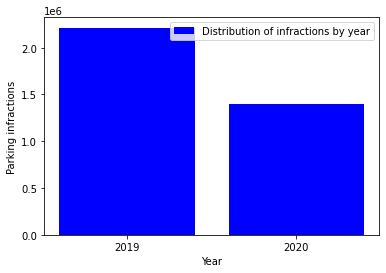

In [113]:
y_axis = year_impact["total infractions"]
x_axis = year_impact["Year"]
plt.bar(x_axis, y_axis, color = "blue", label = "Distribution of infractions by year")
plt.legend()
plt.ylabel("Parking infractions")
plt.xlabel("Year")

Text(0, 0.5, 'month')

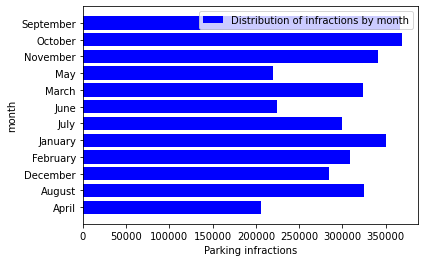

In [115]:
#3.3.1.a.ii Distribution of infractions by month

y_axis = month_impact["total infractions"]
x_axis = month_impact["month"]
plt.barh(x_axis, y_axis, color = "blue", label = "Distribution of infractions by month")
#plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("Parking infractions")
plt.ylabel("month")

Text(0.5, 0, 'Total Revenue')

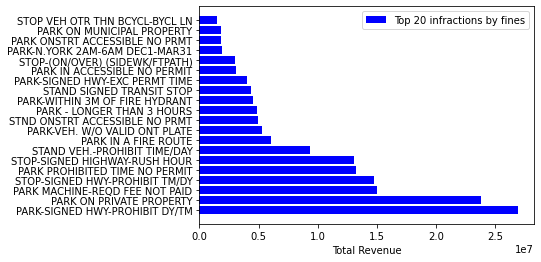

In [120]:
#3.3.1.b Distribution of top 20 infractions by fines

x_axis = top_20_revenue_df["infraction_description"]
y_axis = top_20_revenue_df["total revenue"]
plt.barh(x_axis, y_axis, color = "blue", label = "Top 20 infractions by fines")
#plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("Total Revenue")


In [123]:
#3.3.2.a Geographic distribution (location) of top 20 infractions (count)

top_20_geographic = parking_tags_2019_2020.groupby(["infraction_description",'location2']).count()["infraction_code"]
top_20_geographic = top_20_geographic.nlargest(20)
top_20_geographic_df = pd.DataFrame(top_20_geographic).reset_index()
top_20_geographic_df['lat'] = ""
top_20_geographic_df['lng'] = ""

In [126]:
# fetching lattitudes and longitutes of top 20 addresses where infractions occured

for index, row in top_20_geographic_df.iterrows():
    
    location = row['location2']
    if 'TRL' in location:
          location = location.replace('TRL', 'TRAIL')
            
    parameters['address'] = location
    
    locations = requests.get(f"{base_url}{urllib.parse.urlencode(parameters)}").json()
    
    try:
        top_20_geographic_df.loc[index, "lat"] = locations["results"][0]["geometry"]["location"]["lat"]
        top_20_geographic_df.loc[index, "lng"] = locations["results"][0]["geometry"]["location"]["lng"]
    except IndexError:
        print("Address not found")
        continue



In [127]:
top_20_geographic_df

,infraction_description,location2,infraction_code,lat,lng
0,PARK ON PRIVATE PROPERTY,4001 LESLIE ST,8120,43.7652,-79.3621
1,PARK ON PRIVATE PROPERTY,4700 KEELE ST,7045,43.7735,-79.5019
2,PARK ON PRIVATE PROPERTY,2075 BAYVIEW AVE,6941,43.7228,-79.3729
3,PARK ON PRIVATE PROPERTY,1750 FINCH AVE E,5438,43.7952,-79.3499
4,PARK CONTRARY POSTED CONDITION,1 BRIMLEY RD S,5155,43.7078,-79.2365
5,PARK ON PRIVATE PROPERTY,1265 MILITARY TRL,5060,43.7825,-79.1853
6,STAND VEH.-PROHIBIT TIME/DAY,19 GRAND TRUNK CRES,3971,43.6417,-79.3827
7,PARK MACHINE-REQD FEE NOT PAID,15 MARINE PARADE DR,3880,43.6286,-79.4755
8,PARK ON MUNICIPAL PROPERTY,18 HENDON AVE,3816,43.7815,-79.4172
9,PARK ON PRIVATE PROPERTY,155 LEGION RD N,3769,43.624,-79.4884


In [129]:
#Enabling extensions

!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!jupyter nbextension enable --py --sys-prefix gmaps
info_box_template = """<dl>
<dt>Infraction description</dt><dd>{infraction_description}</dd>
<dt>Address</dt><dd>{location2}</dd>
<dt>No. of Infractions</dt><dd>{infraction_code}</dd>
</dl>
"""

top_20_geographic= [info_box_template.format(**row) for index, row in top_20_geographic_df.iterrows()]

locations =  top_20_geographic_df[['lat','lng']]

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Enabling notebook extension jupyter-gmaps/extension...
      - Validating: OK


In [130]:
fig = gmaps.figure(center=(43,-79), zoom_level=7)
marker_layer = gmaps.marker_layer(locations, info_box_content=top_20_geographic)

fig.add_layer(marker_layer)

fig

#the map ballons can be clicked for further details about infractions

Figure(layout=FigureLayout(height='420px'))

In [ ]:
# Pseudo code

# 3.3.2.b Geographic distribution by ward for top 20 infractions (count)

# 3.3.2.c Geographic distribution by ward for top 20 infractions (revenue)

# 3.3.2.d Any relevant observations in relation to socio demographic profiles.

# I wasn't able to complete the above the 3 deliverables due to time constraints 
# and installation errors of geopandas and geometry

# Following is the pseudo code and ideas to analysie ward and socio demogramphic profiles.

#1 - Find the lats and lngs from parking_tags_2019_2020 in polygon of city wards geomerty column.

#2 - Visualise polygons ising geopands, and plot lats and lngs of parking_tags_2019_2020 data set.

#3 - Find a way to map lats and lngs of parking_tags_2019_2020 data set to hood numbers in socio 
#demographic dataset to analyse those influences.

# import gmaps.geojson_geometries

# from shapely.geometry import Point
# from shapely.geometry.polygon import Polygon

# polygon = city_wards_df["geometry"]
# point = Point(43,-79) # create point
# print(polygon.contains(point)) # check if polygon contains point
# print(point.within(polygon))

In [ ]:
# import geoplot as gplt
# import geopandas as gpd
# import geoplot.crs as gcrs
# import imageio
# import pathlib
# import mapclassify as mc
# import numpy as np

In [ ]:
# toronto = gpd.read_file("City Wards Data.shp")
# toronto.head()